In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Globally fix the size of plot
plt.rcParams['figure.figsize'] = (16, 8)

In [3]:
tc = sns.load_dataset('titanic')

In [4]:
tc.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Checking the information
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
tc.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
tc.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
tc = tc[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked']]

In [9]:
tc.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [10]:
tc['age'].fillna(tc['age'].mean(), inplace = True)

In [11]:
tc.dropna(inplace = True)

In [12]:
# Checking information of dataset
tc.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [13]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    object 
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [14]:
tc.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [15]:
X = tc[ ['pclass', 'fare', 'sex', 'age', 'sibsp', 'parch','embarked']]
y = tc['survived']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((711, 7), (178, 7), (711,), (178,))

<Axes: xlabel='age', ylabel='Density'>

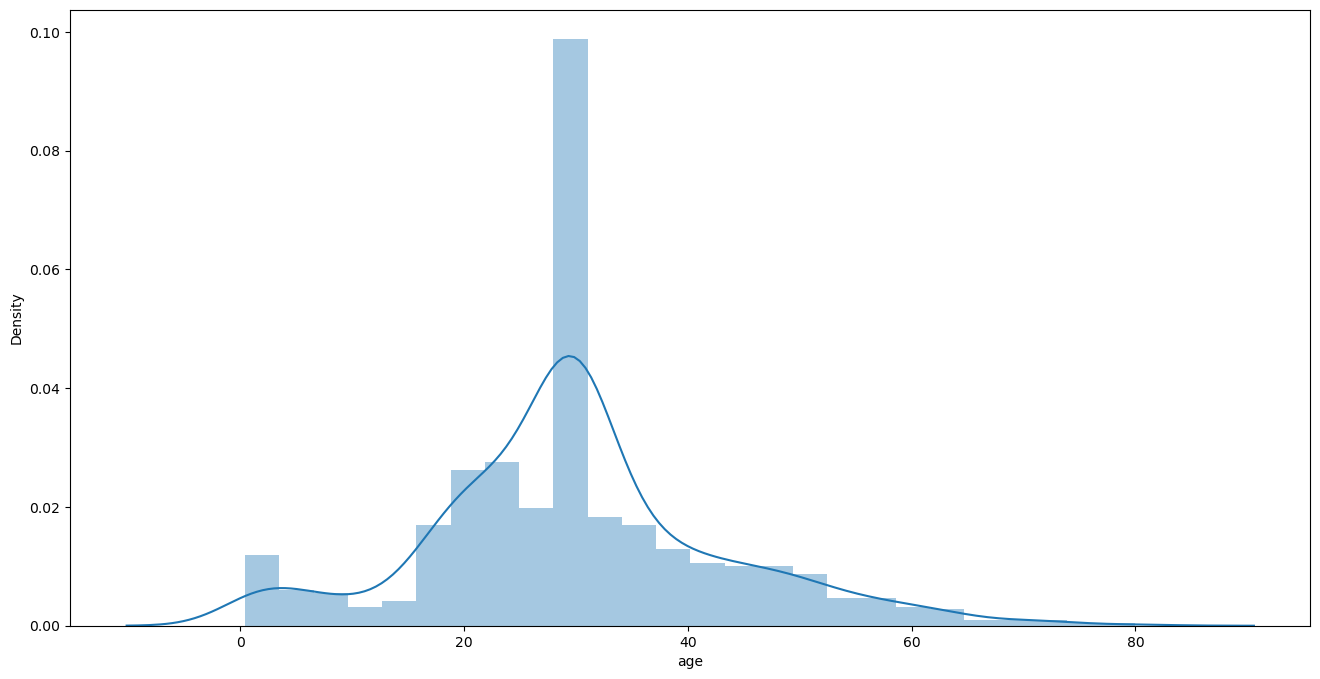

In [18]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(X_train['age'])

<Axes: xlabel='fare', ylabel='Density'>

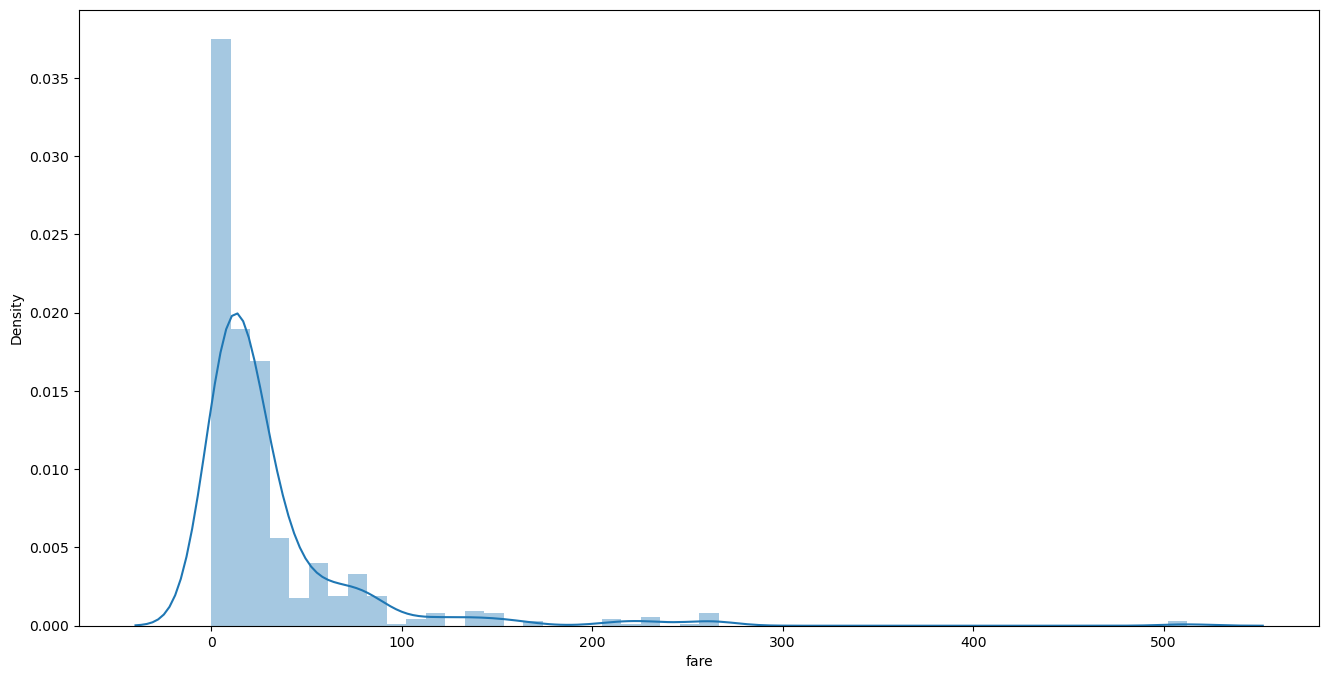

In [19]:
sns.distplot(X_train['fare'])

In [20]:
# Features Scaling
age_scaler = StandardScaler()
fare_scaler = StandardScaler()

In [21]:
age_scaler.fit(pd.DataFrame(X_train['age']))
X_train['age'] = age_scaler.transform(X_train[['age']])

fare_scaler.fit(pd.DataFrame(X_train['fare']))
X_train['fare'] = fare_scaler.transform(X_train[['fare']])

<Axes: xlabel='age', ylabel='Density'>

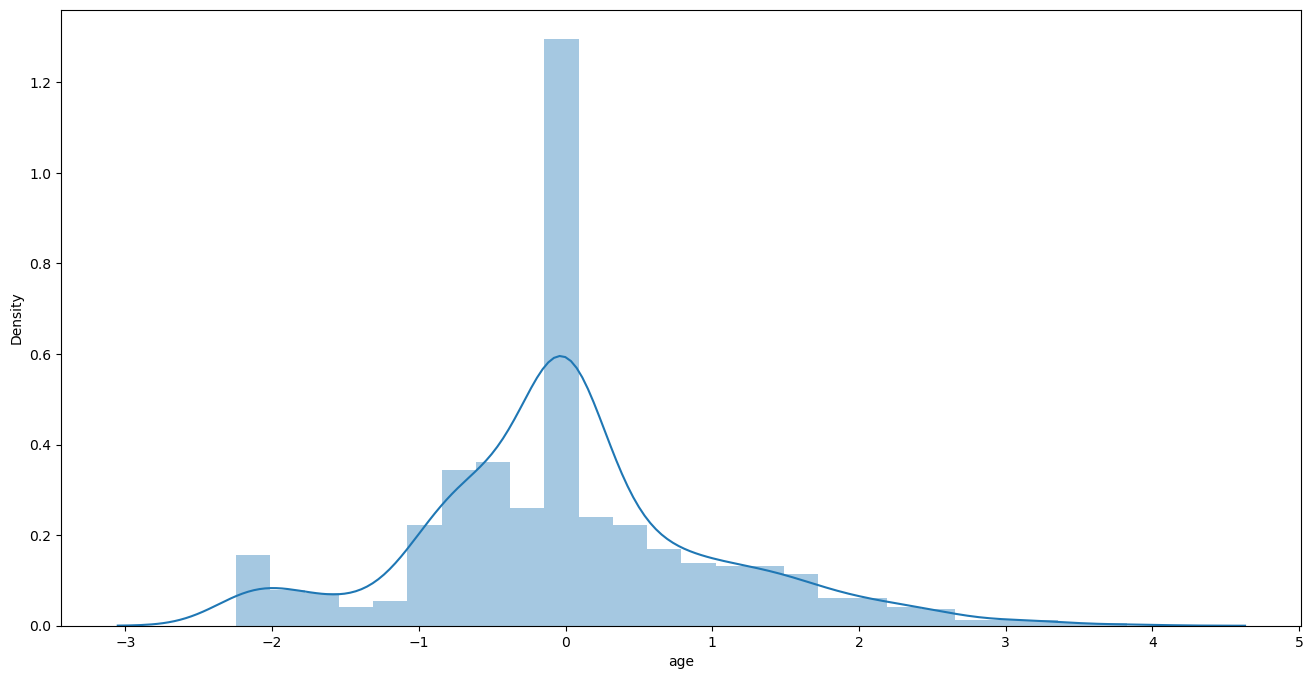

In [22]:
sns.distplot(X_train['age'])

<Axes: xlabel='fare', ylabel='Density'>

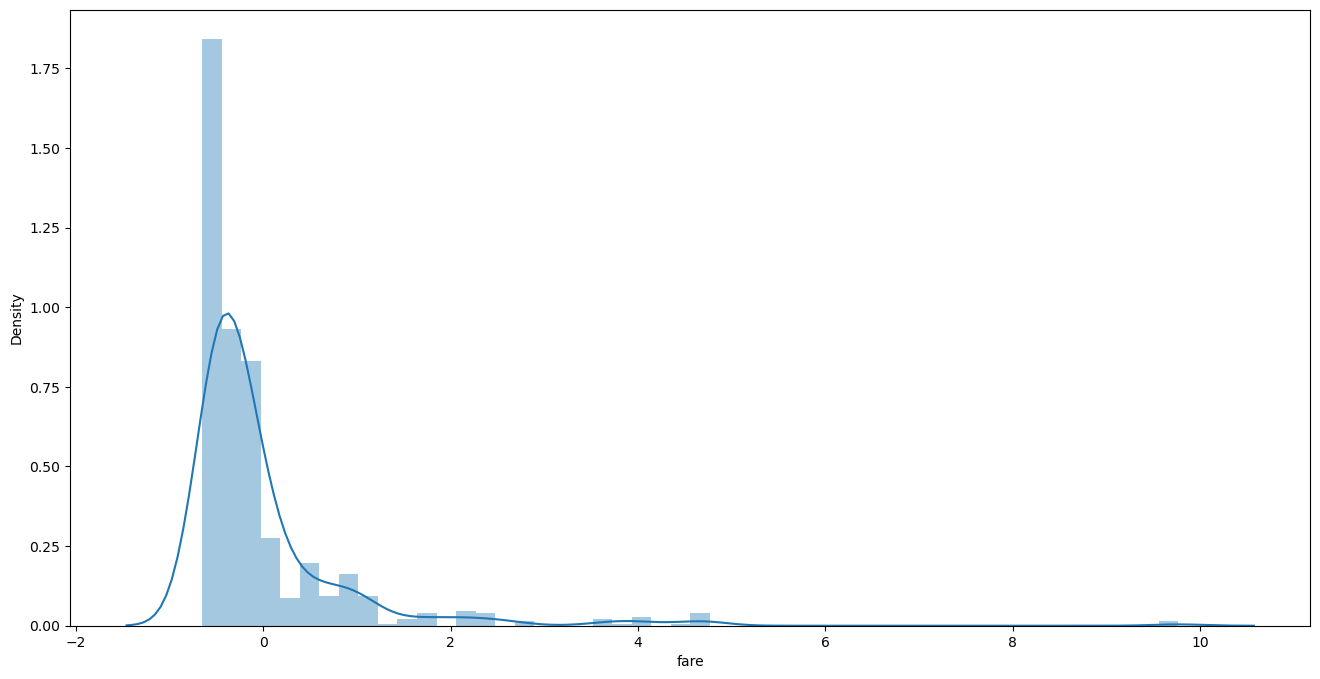

In [23]:
sns.distplot(X_train['fare'])

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 708 to 103
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    711 non-null    int64  
 1   fare      711 non-null    float64
 2   sex       711 non-null    object 
 3   age       711 non-null    float64
 4   sibsp     711 non-null    int64  
 5   parch     711 non-null    int64  
 6   embarked  711 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.4+ KB


In [25]:
sex_encoder = LabelEncoder()
sex_encoder.fit(pd.DataFrame(X_train['sex']))
X_train['sex'] = sex_encoder.transform(X_train['sex'])

embark_encoder = LabelEncoder()
embark_encoder.fit(pd.DataFrame(X_train['embarked']))
X_train['embarked'] = embark_encoder.transform(X_train['embarked'])

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    889 non-null    int64  
 1   fare      889 non-null    float64
 2   sex       889 non-null    object 
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.6+ KB


<Axes: >

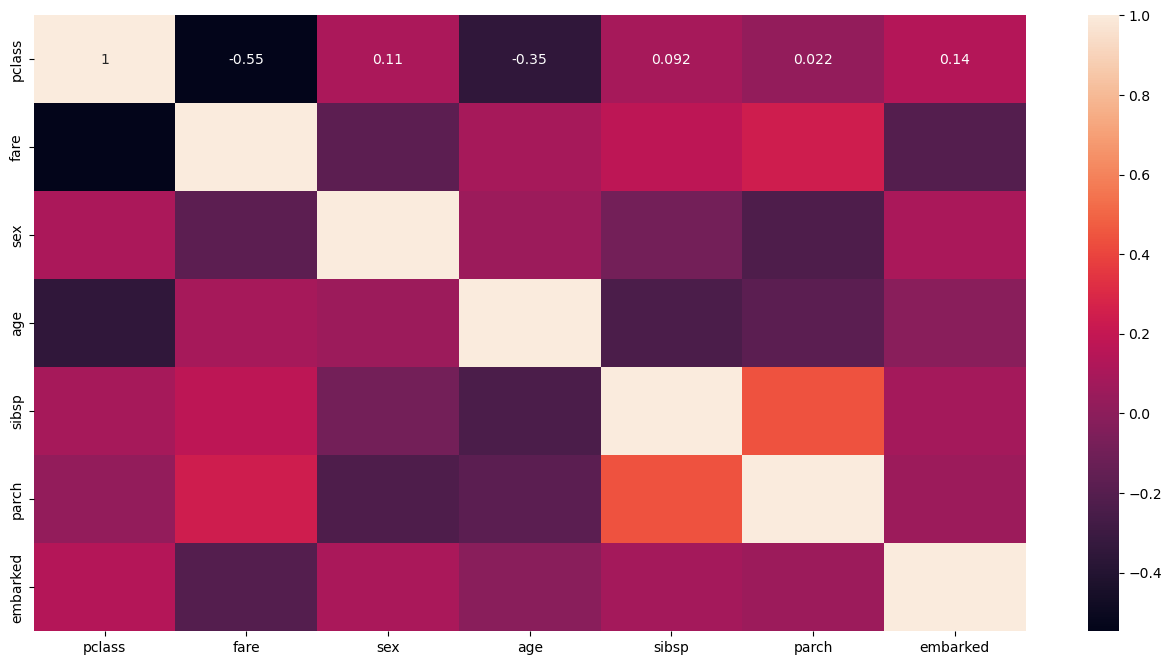

In [27]:
#checking of the corrleation of the features
sns.heatmap(X_train.corr(), annot = True)

In [28]:
# Delete the features pclass because it showing negative correlation with fare
del X_train['pclass']

In [29]:
# pclass deleted
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 708 to 103
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fare      711 non-null    float64
 1   sex       711 non-null    int32  
 2   age       711 non-null    float64
 3   sibsp     711 non-null    int64  
 4   parch     711 non-null    int64  
 5   embarked  711 non-null    int32  
dtypes: float64(2), int32(2), int64(2)
memory usage: 33.3 KB


In [30]:
X_train_original = X_train.copy()
X_train = X_train.values
Y_train = Y_train.values

In [31]:
log_reg = LogisticRegression()

In [32]:
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [33]:
# Checking of the coefficient and intercept values
coefficient = pd.concat([pd.DataFrame(X_train_original.columns), pd.DataFrame(np.transpose(log_reg.coef_))], axis = True)

In [34]:
coefficient

,0,0
0,fare,0.742928
1,sex,-2.503075
2,age,-0.299958
3,sibsp,-0.426579
4,parch,-0.193825
5,embarked,-0.258051


In [35]:
coefficient.columns = ['features', 'coefficient']

In [36]:
coefficient

,features,coefficient
0,fare,0.742928
1,sex,-2.503075
2,age,-0.299958
3,sibsp,-0.426579
4,parch,-0.193825
5,embarked,-0.258051


In [37]:

new_row = pd.DataFrame([{'features': 'Intercept', 'coefficient': log_reg.intercept_[0]}])


coefficient = pd.concat([coefficient, new_row], ignore_index=True)

In [38]:
 coefficient

,features,coefficient
0,fare,0.742928
1,sex,-2.503075
2,age,-0.299958
3,sibsp,-0.426579
4,parch,-0.193825
5,embarked,-0.258051
6,Intercept,1.806453


In [39]:
X_test.head(2)

,pclass,fare,sex,age,sibsp,parch,embarked
281,3,7.8542,male,28.0,0,0,S
435,1,120.0000,female,14.0,1,2,S


In [40]:
X_test.isnull().sum()

pclass      0
fare        0
sex         0
age         0
sibsp       0
parch       0
embarked    0
dtype: int64

### Make scaling of X_test data 

In [41]:
def transform_test_data(test_data, fare_scaler, sex_encoder, age_scaler, embark_encoder):
    test_data['fare'] = fare_scaler.fit_transform(test_data[['fare']])
    test_data['sex'] = sex_encoder.fit_transform(test_data[['sex']])
    test_data[['age']] = age_scaler.fit_transform(test_data[['age']])
    test_data['embarked'] = embark_encoder.fit_transform(test_data[['embarked']])
    del test_data['pclass']
    return test_data
   
    
    

In [42]:
X_test = transform_test_data(X_test, fare_scaler, sex_encoder, age_scaler, embark_encoder)

In [43]:
X_test.head()

,fare,sex,age,sibsp,parch,embarked
281,-0.472150,1,-0.066367,0,0,2
435,1.699024,0,-1.204582,1,2,2
39,-0.406568,0,-1.204582,1,0,0
418,-0.372526,1,0.096235,0,0,2
585,0.917836,0,-0.879378,0,2,2


In [44]:
y_pred = log_reg.predict(X_test)

In [45]:
print(accuracy_score(Y_test, y_pred) * 100)

79.21348314606742


In [46]:
X_test = X_test.values
Y_test = Y_test.values

In [48]:
y_pred = log_reg.predict(X_test)

In [49]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [50]:
confusion_matrix(Y_test, y_pred)

array([[90, 19],
       [18, 51]], dtype=int64)

#  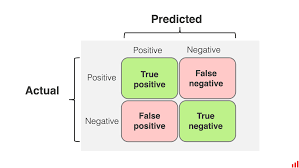


In [51]:
y_perfect_prediction = Y_test

In [52]:
print(confusion_matrix(Y_test, y_perfect_prediction))

[[109   0]
 [  0  69]]


In [53]:
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.73      0.74      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [58]:
# !pip install scikit.plot

In [59]:
import scikitplot as skplt

In [60]:
skplt.metrics.confusion_matrix(Y_test, y_pred, normalize = None)

array([[90, 19],
       [18, 51]], dtype=int64)

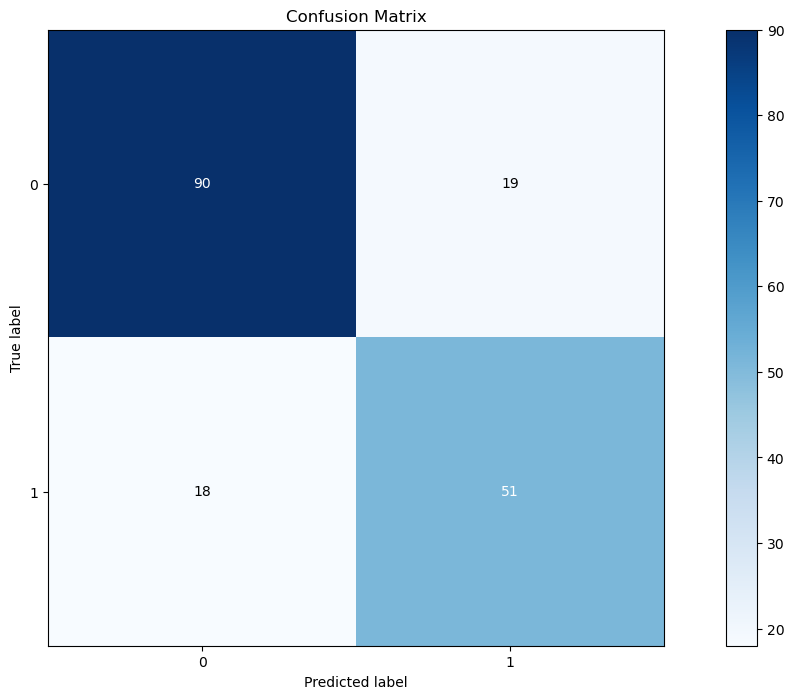

In [62]:
skplt.metrics.plot_confusion_matrix(Y_test, y_pred, normalize = None)
plt.show()

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

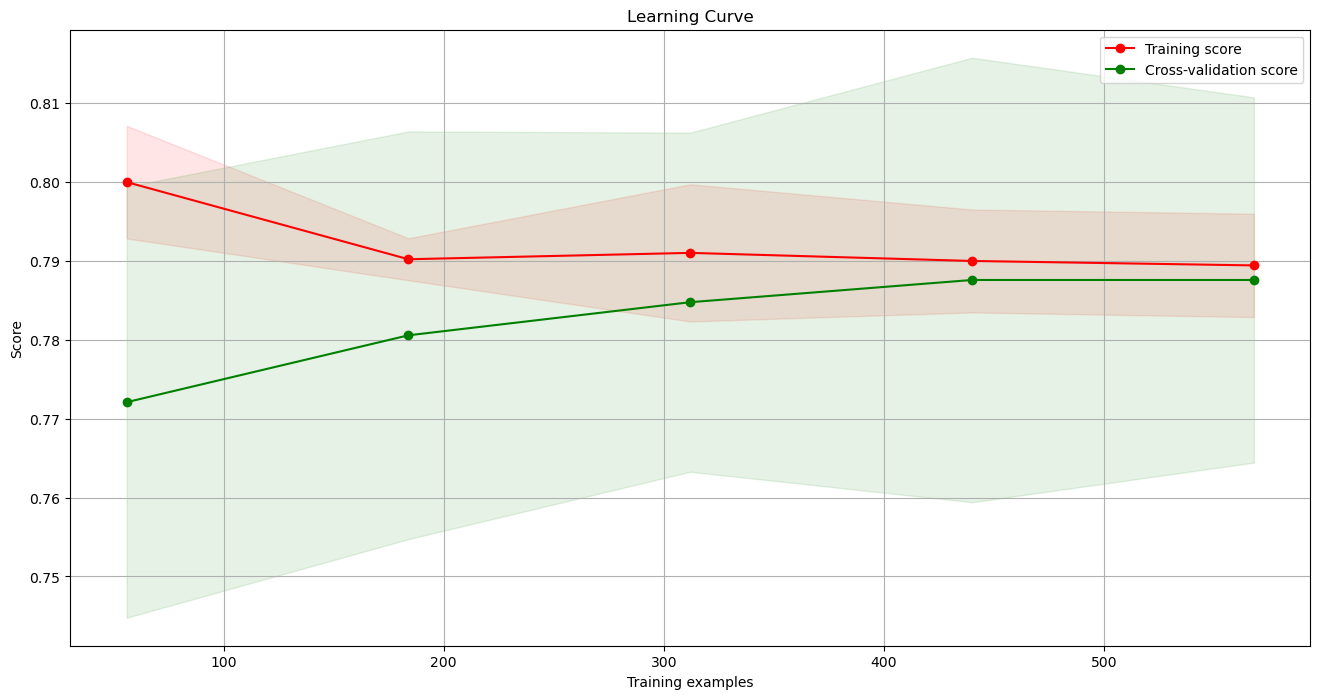

In [63]:
skplt.estimators.plot_learning_curve(log_reg, X_train, Y_train)

In [66]:
# Y_pred_proba 
from sklearn.metrics import roc_auc_score
y_pred_proba = log_reg.predict_proba(X_test)

In [70]:
class_1_proba = list()
for i in y_pred_proba:
    class_1_proba.append(i[1])
print(roc_auc_score(Y_test, class_1_proba) * 100)

83.0940034569871


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

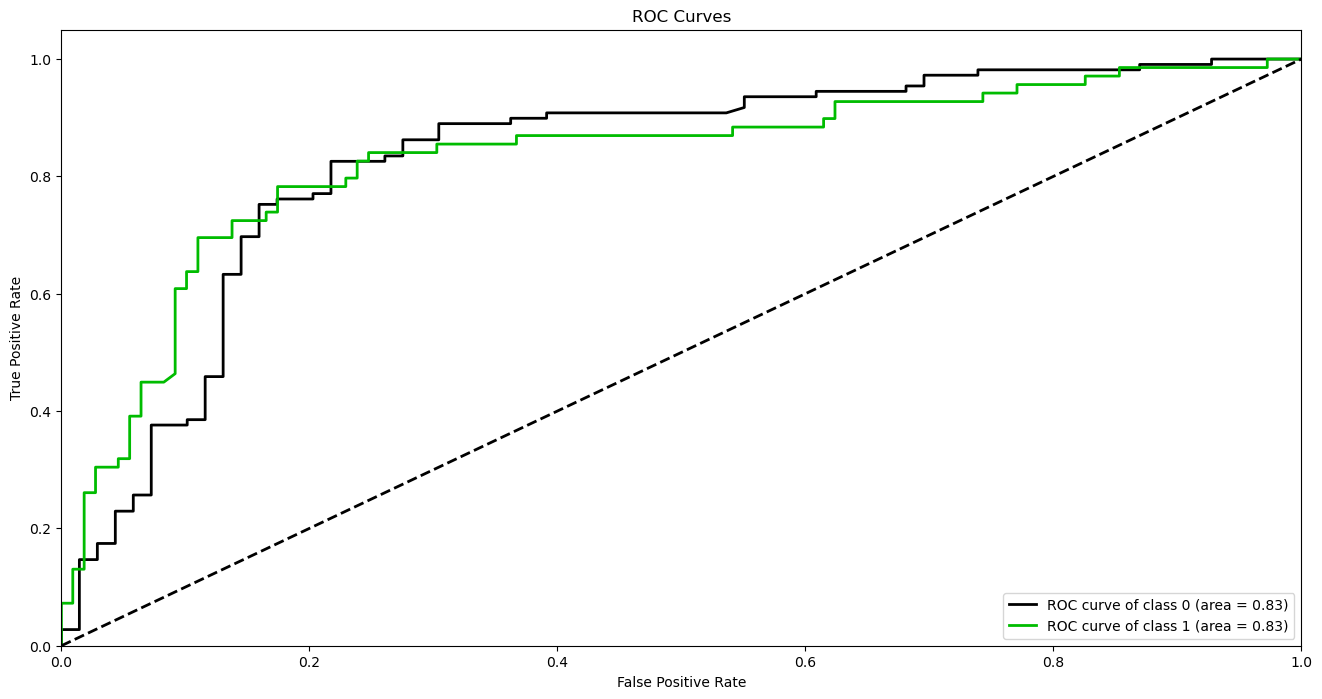

In [71]:
skplt.metrics.plot_roc_curve(Y_test, y_pred_proba, curves = ['each_class'])